B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 导入工具包

In [2]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [3]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [4]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 读入图像，输入模型，获取预测结果

In [5]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# img = cv2.imread('test.jpg')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [6]:
results

mediapipe.python.solution_base.SolutionOutputs

# 人体抠图结果

In [49]:
mask = results.segmentation_mask

In [8]:
mask.shape

(1001, 666)

In [50]:
img.shape

(1001, 666, 3)

In [54]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(1001, 666))

In [52]:
mask = mask > 0.5

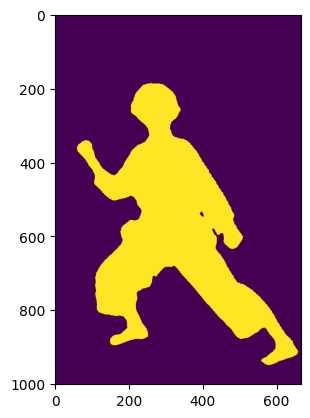

In [53]:
plt.imshow(mask)
plt.show()

In [14]:
import numpy as np

# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得抠掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

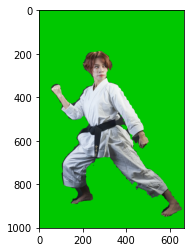

In [14]:
look_img(FG_img)

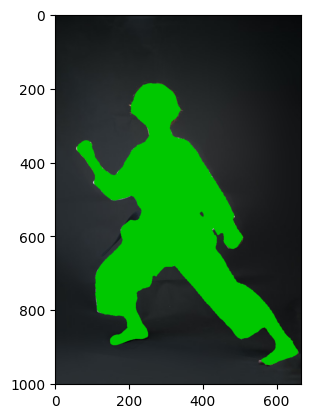

In [15]:
look_img(BG_img)

# 所有关键点检测结果

In [17]:
results.pose_landmarks

landmark {
  x: 0.4239807
  y: 0.28258616
  z: -0.5893572
  visibility: 1.0
}
landmark {
  x: 0.43429264
  y: 0.26324844
  z: -0.5537395
  visibility: 0.9999999
}
landmark {
  x: 0.44603416
  y: 0.26200238
  z: -0.55443096
  visibility: 0.9999999
}
landmark {
  x: 0.45675436
  y: 0.2608501
  z: -0.5541553
  visibility: 0.9999999
}
landmark {
  x: 0.40255636
  y: 0.26598066
  z: -0.5338316
  visibility: 0.9999999
}
landmark {
  x: 0.39155602
  y: 0.26678196
  z: -0.53442883
  visibility: 0.9999999
}
landmark {
  x: 0.38181555
  y: 0.26757252
  z: -0.53460735
  visibility: 0.9999999
}
landmark {
  x: 0.4678535
  y: 0.26774293
  z: -0.3558409
  visibility: 0.9999999
}
landmark {
  x: 0.36507627
  y: 0.27536952
  z: -0.26101202
  visibility: 0.9999995
}
landmark {
  x: 0.44591364
  y: 0.2970024
  z: -0.510974
  visibility: 0.9999995
}
landmark {
  x: 0.40678707
  y: 0.29890957
  z: -0.4888055
  visibility: 0.99999905
}
landmark {
  x: 0.5124063
  y: 0.3599767
  z: -0.3647589
  visibility: 

In [18]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [19]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6176702
y: 0.46807253
z: -0.42875597
visibility: 0.9972608

In [20]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6176702
y: 0.46807253
z: -0.42875597
visibility: 0.9972608

In [21]:
# 左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.6176701784133911

# 解析指定关键点的像素坐标

In [22]:
img.shape

(1001, 666, 3)

In [23]:
h = img.shape[0]
w = img.shape[1]

In [24]:
# 左胳膊肘关键点像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

411.3683388233185

In [25]:
# 左胳膊肘关键点像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

468.5406061410904

# 解析指定关键点的真实物理（米）坐标

In [26]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.NOSE]

x: -0.06998881
y: -0.5853244
z: -0.3429612
visibility: 1.0

In [27]:
results.pose_world_landmarks.landmark[23]

x: 0.0795882
y: -0.0011201072
z: -0.044560134
visibility: 0.9999366

真实物理坐标的原点位于左右髋关节连线的中点（肚脐附近），详见论文。

# 交互式三维可视化

In [28]:
import numpy as np

In [29]:
coords = np.array(results.pose_landmarks.landmark)

In [30]:
coords

array([x: 0.4239807
       y: 0.28258616
       z: -0.5893572
       visibility: 1.0, x: 0.43429264
                        y: 0.26324844
                        z: -0.5537395
                        visibility: 0.9999999, x: 0.44603416
                                               y: 0.26200238
                                               z: -0.55443096
                                               visibility: 0.9999999,
       x: 0.45675436
       y: 0.2608501
       z: -0.5541553
       visibility: 0.9999999, x: 0.40255636
                              y: 0.26598066
                              z: -0.5338316
                              visibility: 0.9999999,
       x: 0.39155602
       y: 0.26678196
       z: -0.53442883
       visibility: 0.9999999, x: 0.38181555
                              y: 0.26757252
                              z: -0.53460735
                              visibility: 0.9999999,
       x: 0.4678535
       y: 0.26774293
       z: -0.3558409
       visi

In [31]:
len(coords)

33

In [33]:
coords[0].x

0.423980712890625

In [46]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [36]:
points.shape

(33, 3)

In [37]:
points

array([[ 0.42398071,  0.28258616, -0.5893572 ],
       [ 0.43429264,  0.26324844, -0.55373949],
       [ 0.44603416,  0.26200238, -0.55443096],
       [ 0.45675436,  0.2608501 , -0.55415529],
       [ 0.40255636,  0.26598066, -0.5338316 ],
       [ 0.39155602,  0.26678196, -0.53442883],
       [ 0.38181555,  0.26757252, -0.53460735],
       [ 0.46785349,  0.26774293, -0.35584089],
       [ 0.36507627,  0.27536952, -0.26101202],
       [ 0.44591364,  0.2970024 , -0.51097399],
       [ 0.40678707,  0.29890957, -0.4888055 ],
       [ 0.51240629,  0.35997671, -0.36475891],
       [ 0.34044096,  0.38322306,  0.04535884],
       [ 0.61767018,  0.46807253, -0.42875597],
       [ 0.24871174,  0.4758414 ,  0.06641062],
       [ 0.70405072,  0.56495017, -0.60760605],
       [ 0.15319842,  0.3988834 , -0.11703487],
       [ 0.73840857,  0.59242314, -0.66094971],
       [ 0.12911186,  0.37105644, -0.15404703],
       [ 0.7162087 ,  0.59545028, -0.70979148],
       [ 0.12553808,  0.36057353, -0.185

In [47]:
import open3d
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])